# Importing Packages

In [1]:
# EDA packages
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
# Plotting Packages
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
# ML Packages

from sklearn import model_selection
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve

#pip install plotly
import plotly.express as px

import warnings 
warnings.filterwarnings('ignore')
import pickle

# 1. Problem Statement

In [ ]:
Problem Statement:

Given a dataset containing sepal length, sepal width, petal length, and petal width of iris flowers from three species
(Setosa, Versicolor, and Virginica), build a machine learning model to classify a given
flower into one of these three species based on its features.

This is a multi-class classification problem, often solved using algorithms like Decision Trees,
Support Vector Machines (SVM), k-Nearest Neighbors (k-NN), and Neural Networks

# 2. Data Gathering

### Load Dataset

In [2]:
df = pd.read_csv("iris.csv")
df


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [3]:
df.columns

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [4]:
df.describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


# 3. EDA and Feature Engineering

In [5]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
species         0
dtype: int64

### 3.1 sepal_length

In [6]:
df['sepal_length']

0      5.1
1      4.9
2      4.7
3      4.6
4      5.0
      ... 
145    6.7
146    6.3
147    6.5
148    6.2
149    5.9
Name: sepal_length, Length: 150, dtype: float64

<Axes: xlabel='sepal_length', ylabel='Density'>

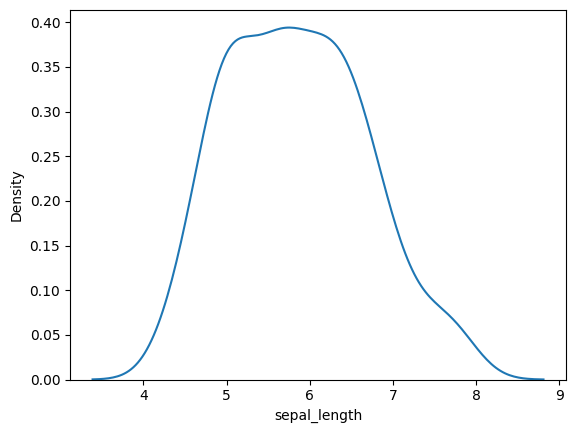

In [7]:
sns.kdeplot(df['sepal_length'])

### 3.2 sepal_width  

In [8]:
df['sepal_width']


0      3.5
1      3.0
2      3.2
3      3.1
4      3.6
      ... 
145    3.0
146    2.5
147    3.0
148    3.4
149    3.0
Name: sepal_width, Length: 150, dtype: float64

<Axes: xlabel='sepal_width', ylabel='Density'>

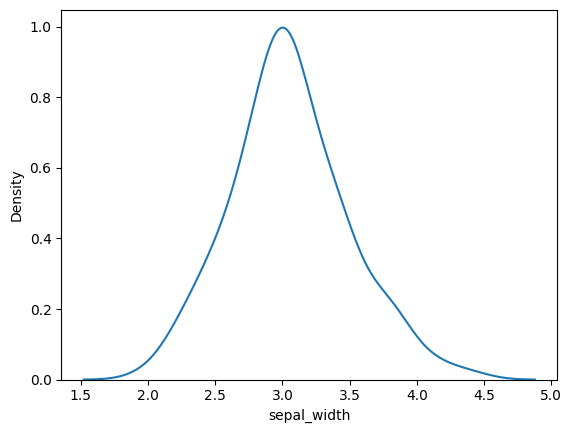

In [9]:
sns.kdeplot (df['sepal_width'])

### 3.3 petal_length

In [10]:
df['petal_length']


0      1.4
1      1.4
2      1.3
3      1.5
4      1.4
      ... 
145    5.2
146    5.0
147    5.2
148    5.4
149    5.1
Name: petal_length, Length: 150, dtype: float64

<Axes: xlabel='petal_length', ylabel='Density'>

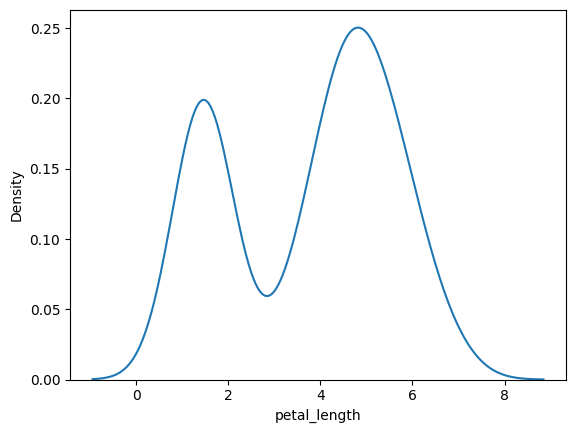

In [11]:
sns.kdeplot(df['petal_length'])

### 3.4 petal_width

In [12]:
df['petal_width']

0      0.2
1      0.2
2      0.2
3      0.2
4      0.2
      ... 
145    2.3
146    1.9
147    2.0
148    2.3
149    1.8
Name: petal_width, Length: 150, dtype: float64

<Axes: xlabel='petal_width', ylabel='Density'>

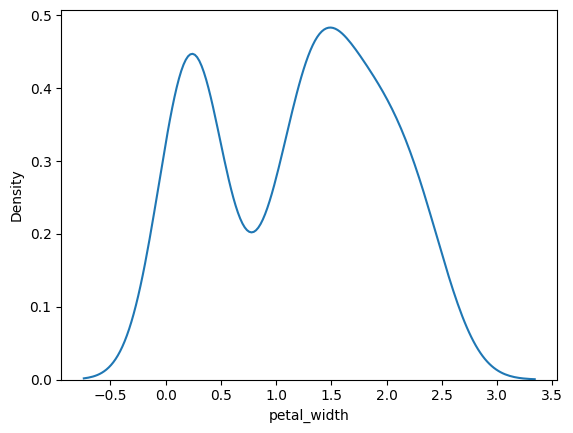

In [13]:
sns.kdeplot(df['petal_width'])

### 3.5 species  

In [14]:
df['species'].value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

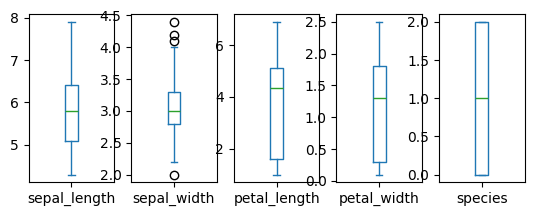

In [27]:
df.plot(kind='box', subplots=True, layout=(2,5), sharex=False, sharey=False)
plt.show()

In [15]:
df

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


In [16]:
df.corr()

ValueError: could not convert string to float: 'setosa'

In [17]:
plt.figure(figsize =(20,10))
sns.heatmap(df.corr(), annot =True)

ValueError: could not convert string to float: 'setosa'

<Figure size 2000x1000 with 0 Axes>

# 4. Model Tranning

### Train Test Split

In [18]:
x = df.drop('species',axis = 1)
y = df['species']
y

0         setosa
1         setosa
2         setosa
3         setosa
4         setosa
         ...    
145    virginica
146    virginica
147    virginica
148    virginica
149    virginica
Name: species, Length: 150, dtype: object

In [19]:
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=15)

In [20]:
x_train

,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
143,6.8,3.2,5.9,2.3
72,6.3,2.5,4.9,1.5
116,6.5,3.0,5.5,1.8
20,5.4,3.4,1.7,0.2
...,...,...,...,...
85,6.0,3.4,4.5,1.6
128,6.4,2.8,5.6,2.1
119,6.0,2.2,5.0,1.5
133,6.3,2.8,5.1,1.5


In [37]:
y_train

0      0
143    2
72     1
116    2
20     0
      ..
85     1
128    2
119    2
133    2
140    2
Name: species, Length: 120, dtype: int64

In [21]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
61,5.9,3.0,4.2,1.5
90,5.5,2.6,4.4,1.2
30,4.8,3.1,1.6,0.2
31,5.4,3.4,1.5,0.4
55,5.7,2.8,4.5,1.3
109,7.2,3.6,6.1,2.5
98,5.1,2.5,3.0,1.1
59,5.2,2.7,3.9,1.4
103,6.3,2.9,5.6,1.8


In [22]:
y_test

6          setosa
61     versicolor
90     versicolor
30         setosa
31         setosa
55     versicolor
109     virginica
98     versicolor
59     versicolor
103     virginica
126     virginica
97     versicolor
74     versicolor
67     versicolor
115     virginica
25         setosa
95     versicolor
100     virginica
9          setosa
129     virginica
71     versicolor
47         setosa
86     versicolor
57     versicolor
48         setosa
5          setosa
112     virginica
148     virginica
122     virginica
78     versicolor
Name: species, dtype: object

In [24]:
y_train.value_counts()

species
setosa        42
virginica     41
versicolor    37
Name: count, dtype: int64

In [25]:
y_test

6          setosa
61     versicolor
90     versicolor
30         setosa
31         setosa
55     versicolor
109     virginica
98     versicolor
59     versicolor
103     virginica
126     virginica
97     versicolor
74     versicolor
67     versicolor
115     virginica
25         setosa
95     versicolor
100     virginica
9          setosa
129     virginica
71     versicolor
47         setosa
86     versicolor
57     versicolor
48         setosa
5          setosa
112     virginica
148     virginica
122     virginica
78     versicolor
Name: species, dtype: object

In [41]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report , confusion_matrix

In [26]:
logistic_Clf = LogisticRegression(multi_class='ovr')
logistic_Clf.fit(x_train,y_train)

LogisticRegression(multi_class='ovr')

In [27]:
logistic_Clf.intercept_

array([  7.0870502 ,   3.73847973, -12.79052418])

In [28]:
x_test

,sepal_length,sepal_width,petal_length,petal_width
6,4.6,3.4,1.4,0.3
61,5.9,3.0,4.2,1.5
90,5.5,2.6,4.4,1.2
30,4.8,3.1,1.6,0.2
31,5.4,3.4,1.5,0.4
55,5.7,2.8,4.5,1.3
109,7.2,3.6,6.1,2.5
98,5.1,2.5,3.0,1.1
59,5.2,2.7,3.9,1.4
103,6.3,2.9,5.6,1.8


# Model Evaluation

### Testing Data Evaluation

In [29]:
#Testing Data 

y_pred = logistic_Clf.predict(x_test)

cnf_matrix = confusion_matrix(y_test,y_pred)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_test,y_pred)
print("Accuracy Score:",accuracy)
print("*"*80)

clf_report = classification_report(y_test,y_pred)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[ 8  0  0]
 [ 0 13  0]
 [ 0  0  9]]
********************************************************************************
Accuracy Score: 1.0
********************************************************************************
Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00         8
  versicolor       1.00      1.00      1.00        13
   virginica       1.00      1.00      1.00         9

    accuracy                           1.00        30
   macro avg       1.00      1.00      1.00        30
weighted avg       1.00      1.00      1.00        30



In [30]:
#Training Data 

y_pred_train = logistic_Clf.predict(x_train)

cnf_matrix = confusion_matrix(y_train,y_pred_train)
print("Confusion Matrix:\n",cnf_matrix)
print("*"*80)

accuracy = accuracy_score(y_train,y_pred_train)
print("Accuracy Score:",accuracy)
print("*"*80)

clf_report = classification_report(y_train,y_pred_train)
print("Classification report:\n",clf_report)

Confusion Matrix:
 [[42  0  0]
 [ 0 32  5]
 [ 0  2 39]]
********************************************************************************
Accuracy Score: 0.9416666666666667
********************************************************************************
Classification report:
               precision    recall  f1-score   support

      setosa       1.00      1.00      1.00        42
  versicolor       0.94      0.86      0.90        37
   virginica       0.89      0.95      0.92        41

    accuracy                           0.94       120
   macro avg       0.94      0.94      0.94       120
weighted avg       0.94      0.94      0.94       120



In [31]:

logistic_Clf.score(x_train,y_train)

0.9416666666666667

# Save Model

In [56]:
import pickle

In [32]:
with open('logistic_reg_model.pkl', 'wb') as f:
    pickle.dump(logistic_Clf , f)

In [ ]:
1.Create Pickle File
2.Take Input from user
3.test_aray(2 dim)
4.Pass the test array to model

5. Go no new sheet import pickle file

In [33]:
input("Enter value of Sepellength")

Enter value of Sepellength 4.8


'4.8'

In [34]:
import pickle
import  json
import numpy as np
import pandas as pd

In [59]:
ex2 = np.array([6.2,3.4,5.4,2.3]).reshape(1,-1)

In [35]:
with open('logistic_reg_model.pkl','rb') as f:
    logistic_model = pickle.load(f)


logistic_model

LogisticRegression(multi_class='ovr')

In [ ]:
SepalLengthCm = 3.2
SepalWidthCm = 3.4
PetalLengthCm = 4.0
PetalWidthCm = 2.1

In [36]:
fetaure_count = logistic_model.n_features_in_
fetaure_count

4

In [37]:
test_array = np.zeros(fetaure_count)
test_array

array([0., 0., 0., 0.])

In [39]:
flowerspieces = logistic_model.predict([test_array])[0]
print("Predicted flower spices is: ",flowerspieces)

Predicted flower spices is:  setosa
